In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from src.preprocessing import process_image, process_video, preprocess
from src.distance_measures import analyse
from src.gaussian_noise import generate_noise
from skimage.color import label2rgb
from skimage.morphology import label
from IPython.display import display, clear_output
plt.rcParams['image.cmap'] = 'gray'

c:\Users\asken\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
L = 100
size=(500,500)

In [2]:
label_video = process_video('images/cheese_gel.avi', threshold=0.3, skip_size=20, size=size)

In [3]:
F_list, G_list = analyse(label_video, L=L)

100%|██████████| 12/12 [00:37<00:00,  3.15s/it]


In [4]:
noise_list = generate_noise(size, amount=20, threshold=0.3, disk_size=4)

In [6]:
noiseF_list, noiseG_list = analyse(np.array(noise_list), L=L)

100%|██████████| 20/20 [04:58<00:00, 14.95s/it]


In [7]:
# Taking mean of noisy images
noiseF = np.mean(noiseF_list, axis=0)
noiseG = np.mean(noiseG_list, axis=0)

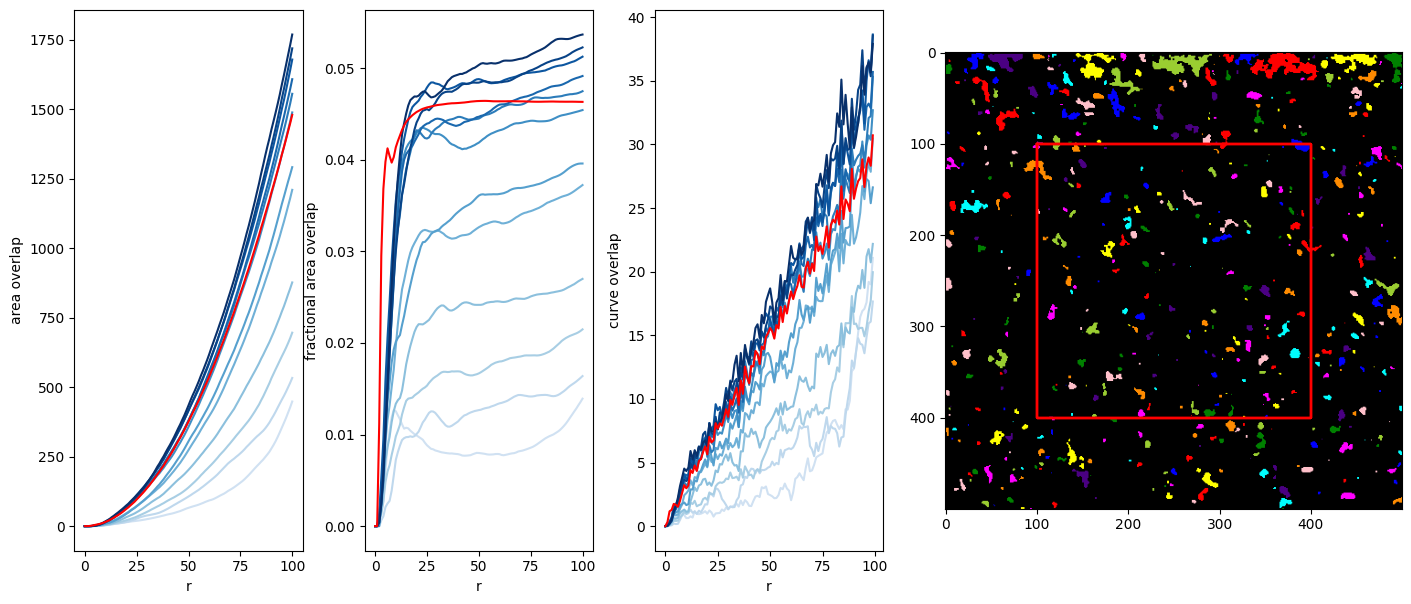

In [10]:
fig, ax = plt.subplots(1,4, figsize=(14,6), gridspec_kw={'width_ratios': [1, 1, 1, 2]})
fig.subplots_adjust(wspace=0.4)
plt.tight_layout()

colors = cm.Blues(np.linspace(0.2, 1, len(label_video)))

for i in range(len(F_list)):
    M = label_video[i].shape[0] - L
    bx = (L, M, M, L, L)
    by = (L, L, M, M, L)
    ax[3].plot(bx, by, '-r')
    ax[3].imshow(label2rgb(label_video[i], bg_label=0))

    ax[0].plot(F_list[i], color=colors[i])
    ax[0].set_xlabel('r')
    ax[0].set_ylabel('area overlap')

    ax[1].plot(F_list[i]/G_list[i], color=colors[i])
    ax[1].set_xlabel('r')
    ax[1].set_ylabel('fractional area overlap')

    ax[2].plot((F_list[i])[1:]-(F_list[i])[:-1], color=colors[i])
    ax[2].set_xlabel('r')
    ax[2].set_ylabel('curve overlap')

    # Saves to folder called 'frames'
    # filename = 'frames/subplot_{:03d}.png'.format(p)
    # fig.savefig(filename)
    display(fig)
    clear_output(wait = True)

ax[0].plot(noiseF, color='r')
ax[0].set_xlabel('r')
ax[0].set_ylabel('area overlap')

ax[1].plot(noiseF/noiseG, color='r')
ax[1].set_xlabel('r')
ax[1].set_ylabel('fractional area overlap')

ax[2].plot(noiseF[1:]-noiseF[:-1], color='r')
ax[2].set_xlabel('r')
ax[2].set_ylabel('curve overlap')
plt.show()